# 28 de septiembre de 2023

In [2]:
import functions as fx 
import pandas as pd
from Bio import Entrez
Entrez.email = "diegocar@lcg.unam.mx"
Entrez.apikey = "34677fdcfd2f0659a7f9ee05ab6e44704f09"

SyntaxError: invalid syntax (<ipython-input-2-cef57363c82e>, line 1)

In [ ]:
def plot_species_dist(data, rel):
    ext = pd.merge(data,rel)
    print(f"n = {ext.shape[0]}")
    ext["Specie"].value_counts().plot(kind="barh")

def comp_filt(f1, label1, f2, label2, rel):
    x_raw = pd.DataFrame(pd.merge(f1, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":f"{label1}", "index":"Specie"})
    x_data = pd.DataFrame(pd.merge(f2,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":f"{label2}", "index":"Specie"})
    pd.merge(x_raw, x_data).set_index("Specie").plot(kind="barh")

def comp_filt2(f1, label1, f2, label2, f3, label3, f4, label4, rel):
    x = pd.DataFrame(pd.merge(f1, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":f"{label1}", "index":"Specie"})
    y = pd.DataFrame(pd.merge(f2,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":f"{label2}", "index":"Specie"})
    z = pd.DataFrame(pd.merge(f3, rel)["Specie"].value_counts()).reset_index().rename(columns={"Specie":f"{label3}", "index":"Specie"})
    w = pd.DataFrame(pd.merge(f4,rel))["Specie"].value_counts().reset_index().rename(columns={"Specie":f"{label4}", "index":"Specie"})
    a = pd.merge(x, y)
    b = pd.merge(z, w)
    pd.merge(a, b).set_index("Specie").plot(kind="bar")

def pct(v1,v2,rel):
    taxid_specie = rel[["TaxId", "Specie"]]
    sp_1 = v1[["GSM_taxid_ch1", "GSM_geo_accession"]].rename(columns={"GSM_taxid_ch1":"TaxId"}).merge(taxid_specie)
    sp_2 = v2[["GSM_taxid_ch1", "GSM_geo_accession"]].rename(columns={"GSM_taxid_ch1":"TaxId"}).merge(taxid_specie)
    species = sp_2.Specie.unique()
    for s in species:
        gsms_1 = set(sp_1[sp_1.Specie == s].GSM_geo_accession.unique())
        gsms_2 = set(sp_2[sp_2.Specie == s].GSM_geo_accession.unique())
        print(f"{s} -> {round(len(gsms_2)*100/len(gsms_1))}%")

In [4]:
raw = pd.read_csv("../results/230928FilterComp/filt_V1/raw_230928filtv1.tsv", sep= "\t")
raw.TaxId = raw.TaxId.astype("str")
filt_v1 = pd.read_csv("../results/230928FilterComp/filt_V1/230928filtv1.tsv", sep="\t")
filt_v1.TaxId = filt_v1.TaxId.astype("str")
rel = pd.read_csv("../results/230928FilterComp/filt_V1/taxonomy_relations_mini.tsv", sep= "\t").rename(columns={"ScientificNameSpecie": "Specie"})
rel.TaxId = rel.TaxId.astype("str")

In [ ]:
filt_v2_specie = fx.apply_GEO_filters(raw, "specie", './', "specie")

In [ ]:
filt_v2_same = fx.apply_GEO_filters(raw, "sameTaxId", './', "same")

In [7]:
print(f"Raw: {raw.shape}")
print(f"v1: {filt_v1.shape}\nv2 specie: {filt_v2_specie.shape}\nv2 same{filt_v2_same.shape}")

Raw: (11363, 25)
v1: (4439, 25)
v2 specie: (8188, 25)
v2 same(6223, 25)


### Distribución de entradas por especie

n = 4993


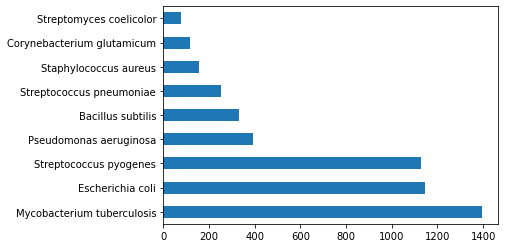

In [8]:
plot_species_dist(filt_v1, rel)

n = 8832


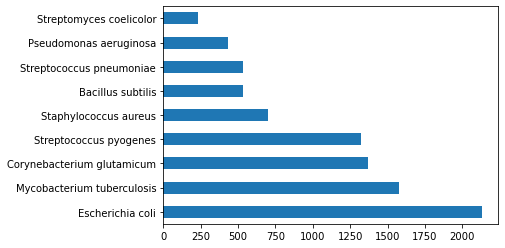

In [9]:
plot_species_dist(filt_v2_specie, rel)

n = 6777


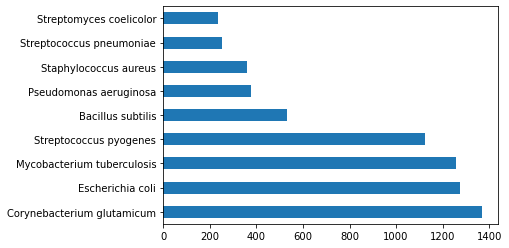

In [10]:
plot_species_dist(filt_v2_same, rel)

### Comparación contra raw

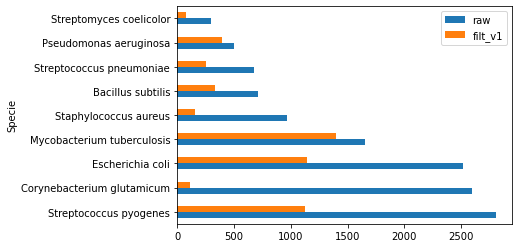

In [154]:
comp_filt(raw, "raw", filt_v1, "filt_v1", rel)

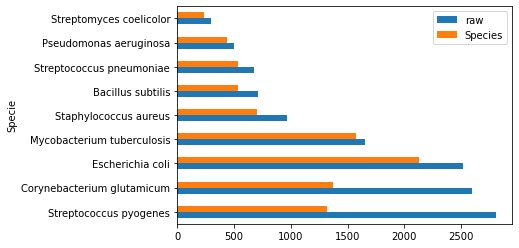

In [12]:
comp_filt(raw, "raw", filt_v2_specie, "Species", rel)

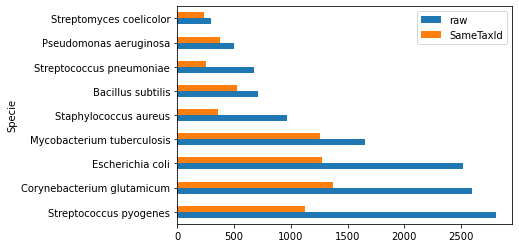

In [13]:
comp_filt(raw, "raw", filt_v2_same, "SameTaxId", rel)

### Comparación contra v1

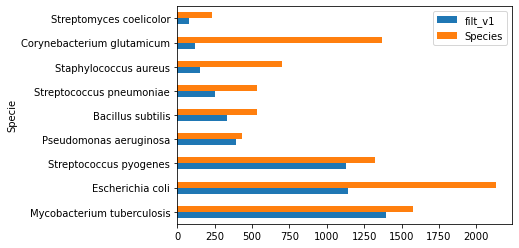

In [14]:
comp_filt(filt_v1, "filt_v1", filt_v2_specie, "Species", rel)

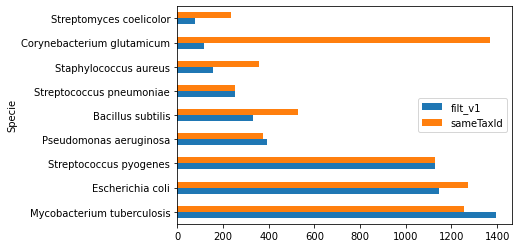

In [15]:
comp_filt(filt_v1, "filt_v1", filt_v2_same, "sameTaxId", rel)

### Comparación entre v2

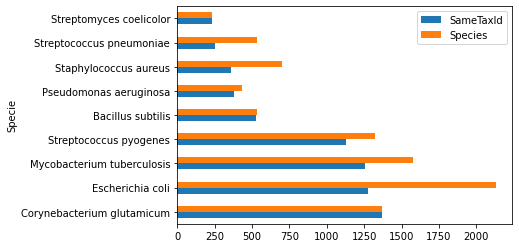

In [16]:
comp_filt(filt_v2_same, "SameTaxId", filt_v2_specie, "Species", rel)

### Comparación todo

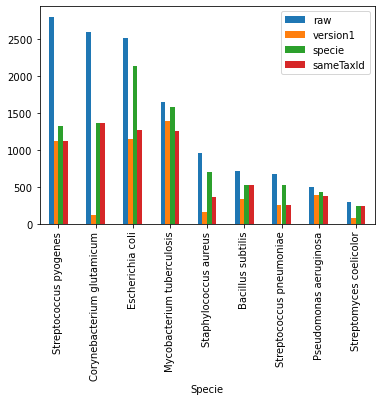

In [17]:
comp_filt2(raw, "raw", filt_v1, "version1", filt_v2_specie, "specie", filt_v2_same, "sameTaxId", rel)

### Aeruginosa y Tuberculosis

In [18]:
v1 = set(filt_v1.GSM_geo_accession.to_list())
v2 = set(filt_v2_same.GSM_geo_accession.to_list())

In [19]:
print(f"Filt1 : {len(v1)}")
print(f"Filt2 : {len(v2)}")

Filt1 : 4373
Filt2 : 6207


In [20]:
lost = raw[raw.GSM_geo_accession.isin(v1 - v2)][["GSE_geo_accession",'GSM_geo_accession', 'TaxId','GPL_taxid',  'GSM_taxid_ch1', ]]

In [21]:
taxid_names = rel[["TaxId","ScientificName"]].drop_duplicates()
taxid = taxid_names.rename(columns={"ScientificName":"Query"})
ch1 = taxid_names.rename(columns={"TaxId":"GSM_taxid_ch1", "ScientificName":"GSM_ch1"})


In [22]:
lost = lost.merge(taxid).merge(ch1)

In [23]:
lost_types = lost[["Query", "GSM_ch1"]].drop_duplicates()
lost_types

,Query,GSM_ch1
0,Bacillus subtilis subsp. subtilis str. 168,Gluconobacter oxydans 621H
13,Bacillus subtilis subsp. subtilis str. 168,Corynebacterium glutamicum ATCC 13032
19,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032
25,Bacillus subtilis subsp. subtilis str. 168,Allochromatium vinosum DSM 180
51,Escherichia coli str. K-12 substr. MG1655,Allochromatium vinosum DSM 180
73,Pseudomonas aeruginosa PAO1,Allochromatium vinosum DSM 180
90,Escherichia coli str. K-12 substr. MG1655,Escherichia coli BW25113
100,Escherichia coli CFT073,Escherichia coli BW25113
110,Escherichia coli str. K-12 substr. MG1655,Escherichia coli APEC O2
116,Escherichia coli CFT073,Escherichia coli APEC O2


In [24]:
false_neg = lost[lost.Query == lost.GSM_ch1]
false_neg

,GSE_geo_accession,GSM_geo_accession,TaxId,GPL_taxid,GSM_taxid_ch1,Query,GSM_ch1
19,GSE45907,GSM1119374,196627,442;562;1718;224308,196627,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032
20,GSE45907,GSM1119375,196627,442;562;1718;224308,196627,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032
21,GSE45907,GSM1119376,196627,442;562;1718;224308,196627,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032
22,GSE45907,GSM1119377,196627,442;562;1718;224308,196627,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032
23,GSE45907,GSM1119378,196627,442;562;1718;224308,196627,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032
24,GSE45907,GSM1119379,196627,442;562;1718;224308,196627,Corynebacterium glutamicum ATCC 13032,Corynebacterium glutamicum ATCC 13032


### Pyogenes

In [145]:
def jaccard(a,b):
    return(len(a&b)/len(a|b))

def simpson(a,b):
    return(len(a&b)/len(b))

def compare(v1,v2,rel):
    taxid_specie = rel[["TaxId", "Specie"]]
    sp_1 = v1[["GSM_taxid_ch1", "GSM_geo_accession"]].rename(columns={"GSM_taxid_ch1":"TaxId"}).merge(taxid_specie)
    sp_2 = v2[["GSM_taxid_ch1", "GSM_geo_accession"]].rename(columns={"GSM_taxid_ch1":"TaxId"}).merge(taxid_specie)
    species = sp_2.Specie.unique()
    for s in species:
        gsms_1 = set(sp_1[sp_1.Specie == s].GSM_geo_accession.unique())
        gsms_2 = set(sp_2[sp_2.Specie == s].GSM_geo_accession.unique())

        if len(gsms_1) == len(gsms_2):
            print(f"{s} -> Jaccard: {jaccard(gsms_1, gsms_2)}")
        elif len(gsms_1) > len(gsms_2):
            print(f"{s} -> Simpson v1(v2): {simpson(gsms_1, gsms_2)}")
        else:
            print(f"{s} -> Simpson v2(v1): {simpson(gsms_2, gsms_1)}")



In [133]:
compare(filt_v1, filt_v2_same, rel)

Bacillus subtilis -> Simpson v2(v1): 1.0
Corynebacterium glutamicum -> Simpson v2(v1): 0.9512195121951219
Escherichia coli -> Simpson v2(v1): 0.9423247559893523
Mycobacterium tuberculosis -> Simpson v1(v2): 0.9952153110047847
Pseudomonas aeruginosa -> Simpson v1(v2): 0.9919137466307277
Staphylococcus aureus -> Simpson v2(v1): 1.0
Streptomyces coelicolor -> Simpson v2(v1): 1.0
Streptococcus pneumoniae -> Jaccard: 1.0
Streptococcus pyogenes -> Jaccard: 1.0


In [134]:
compare(filt_v1, filt_v2_specie, rel)

Bacillus subtilis -> Simpson v2(v1): 1.0
Corynebacterium glutamicum -> Simpson v2(v1): 0.9512195121951219
Escherichia coli -> Simpson v2(v1): 1.0
Mycobacterium tuberculosis -> Simpson v2(v1): 1.0
Pseudomonas aeruginosa -> Simpson v2(v1): 1.0
Staphylococcus aureus -> Simpson v2(v1): 1.0
Streptomyces coelicolor -> Simpson v2(v1): 1.0
Streptococcus pneumoniae -> Simpson v2(v1): 1.0
Streptococcus pyogenes -> Simpson v2(v1): 1.0


In [135]:
compare(filt_v2_specie, filt_v2_same, rel)

Bacillus subtilis -> Simpson v1(v2): 1.0
Corynebacterium glutamicum -> Jaccard: 1.0
Escherichia coli -> Simpson v1(v2): 1.0
Mycobacterium tuberculosis -> Simpson v1(v2): 1.0
Pseudomonas aeruginosa -> Simpson v1(v2): 1.0
Staphylococcus aureus -> Simpson v1(v2): 1.0
Streptomyces coelicolor -> Jaccard: 1.0
Streptococcus pneumoniae -> Simpson v1(v2): 1.0
Streptococcus pyogenes -> Simpson v1(v2): 1.0
